<a href="https://colab.research.google.com/github/Novalwahyudin/M.NovalWahyudin_/blob/main/Tugas_Mini_Project_3333210012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/file/d/1nBDD2FXCMudjvFWs4J_aoFu4wk3qNqGH/view?usp=sharing

masukan link pada gdrive untuk menginport data


1. Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score  

pada coding kali ini perintah untuk mengimport data pada gdrive masuk ke dalam colab

In [ ]:
!gdown --id 1nBDD2FXCMudjvFWs4J_aoFu4wk3qNqGH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nBDD2FXCMudjvFWs4J_aoFu4wk3qNqGH
To: /content/hotel_bookings.csv
100% 16.9M/16.9M [00:00<00:00, 76.3MB/s]


digunakan untuk mendownload file google drive yang sudah dibagikan secara publik dengan cara memanggil id file tersebut.

2. Importing Dataset

In [ ]:
import pandas as pd
dataset = pd.read_csv('hotel_bookings.csv')
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Syntax ini perintah untuk membuat data frame

3. Exploratory Data

In [ ]:
dataset.shape

(119390, 32)

syntax ini perintah untuk mengetahui jumlah elemen pada frame. diketahui pada frame di atas di dapat 119390 baris dan 32 kolom

In [ ]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

syntax ini untuk memunculkan nama judul di atas elemen frame

In [ ]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

syntax ini untuk mengetahui type data pada dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

syntax ini untuk mengetahui bahwa dataset tersebut, memiliki total: 32 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 119390 baris. 

In [ ]:
dataset.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

syntax ini untuk mengembalikan jumlah nilai yang uni, dan nilai NaN pada data tidak dihitung.

4. Handling Missing Value

In [ ]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

sytax ini untuk memunculkan/menemukan missing value pada dataset

In [ ]:
dataset['children'].dtypes

dtype('float64')

untuk mengetahui type data diketahui type data di atas adalah Float64

In [ ]:
dataset['country'].dtypes

dtype('O')

untuk mengetahui type data diketahui type data di atas adalah 0

In [ ]:
dataset['agent'].dtypes

dtype('float64')

untuk mengetahui type data diketahui type data di atas adalah Float64

In [ ]:
dataset['company'].dtypes

dtype('float64')

untuk mengetahui type data diketahui type data di atas adalah Float64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
dataset[['children', 'agent', 'company']] = imputer.transform(dataset[['children', 'agent', 'company']])
dataset.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values adalah kolom country.

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
dataset = dataset.drop('reservation_status_date', axis=1)
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out


pada syntax ini untuk menghapus baris. baris yang di apus adalah reservation_status_date

5. Data Visualization

In [ ]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,31.411012,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,189.266735,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,189.266735,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


syntax ini untuk menampilkan deskripsi statistik dari dataset.

<Axes: >

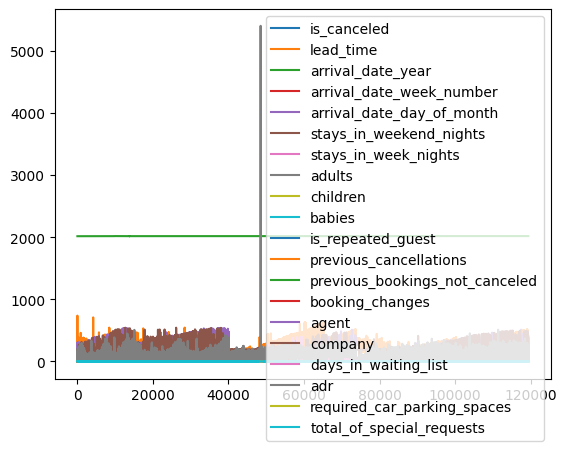

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

syntax ini untuk menampilkan jenis grafik yang paling sering digunakan untuk merepresentasikan data numerik dan kategorik dalam bentuk bar.dan juga memeriksa keberadaan outlier, diketahui outlier di dapat lead_time dan Adr

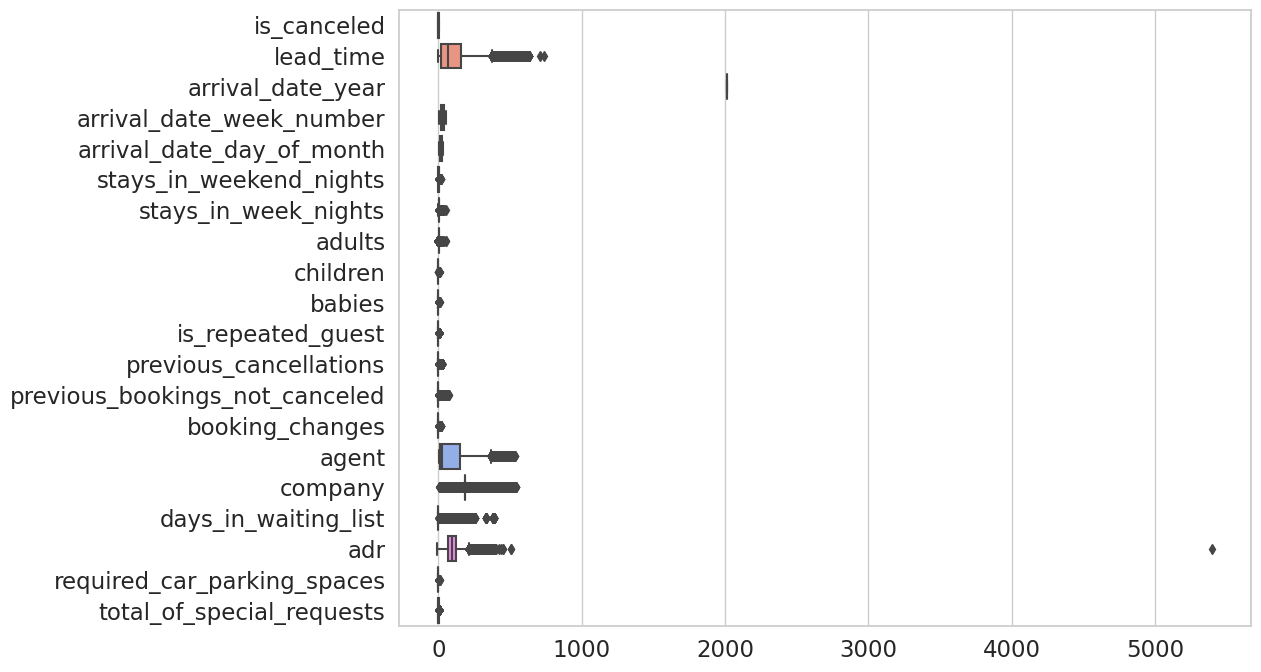

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

digunakan sebagai visualisasi data baik statis maupun interaktif. didapat data yang melebihi batas adalah adr dan lead_time

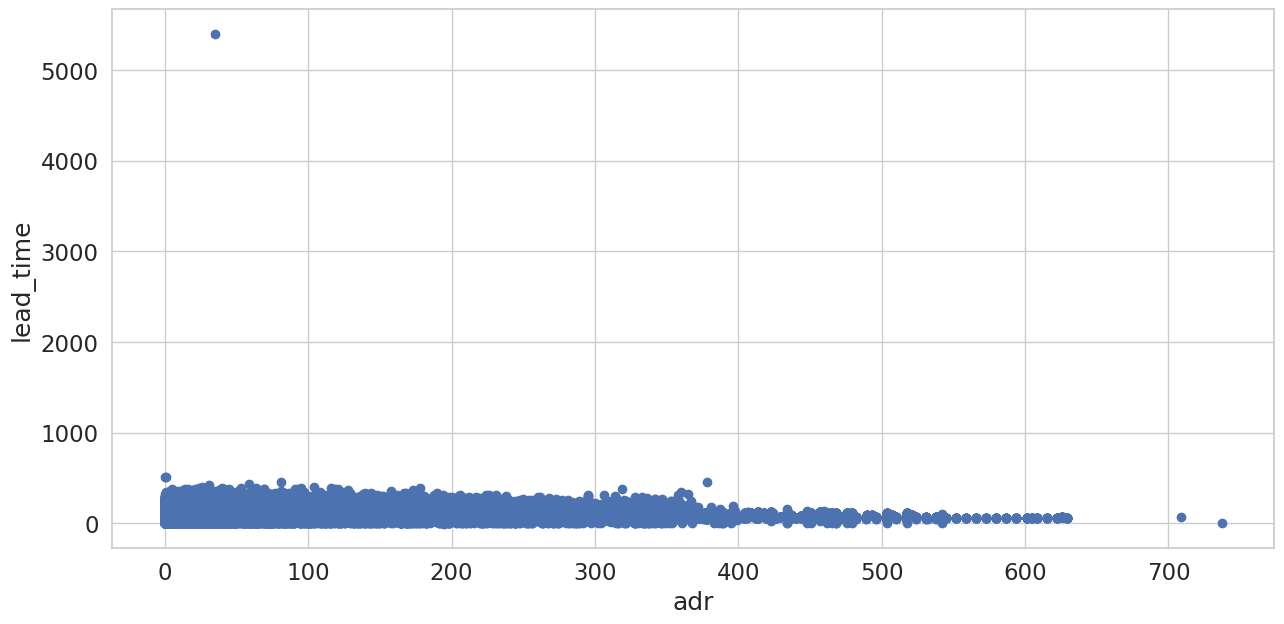

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['lead_time'], dataset['adr'])
 
# x-axis label
ax.set_xlabel('adr')
 
# y-axis label
ax.set_ylabel('lead_time')
plt.show()

untuk memunculkan scatter plot. di dapat mid point di lead_time

In [ ]:
import sklearn

# IQR lead_time
Q1 = np.percentile(dataset['lead_time'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['lead_time'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (119390, 30)


untuk menampilkan data yang di kelompokan di dapat 119390 baris dan 30 kolom

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['lead_time'] > upper].index
outliers_lower = dataset[dataset['lead_time'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (116385, 30)


syntax untuk memodifikasi data di dapat 116385 baris dan 30 kolom

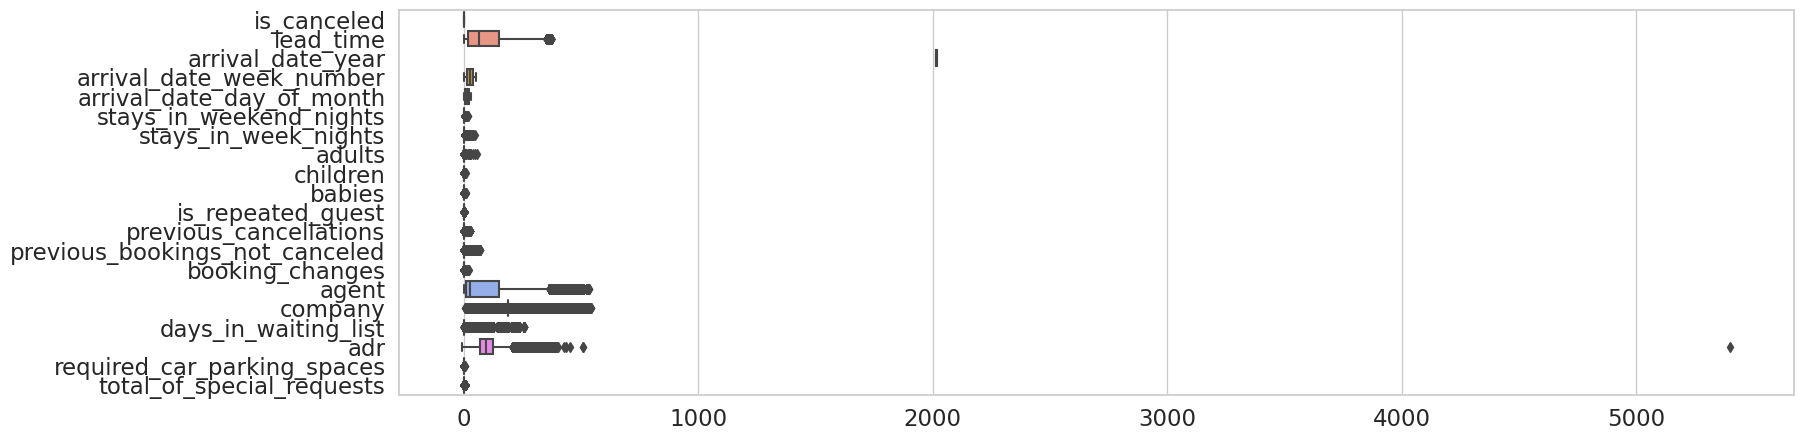

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(18,5)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

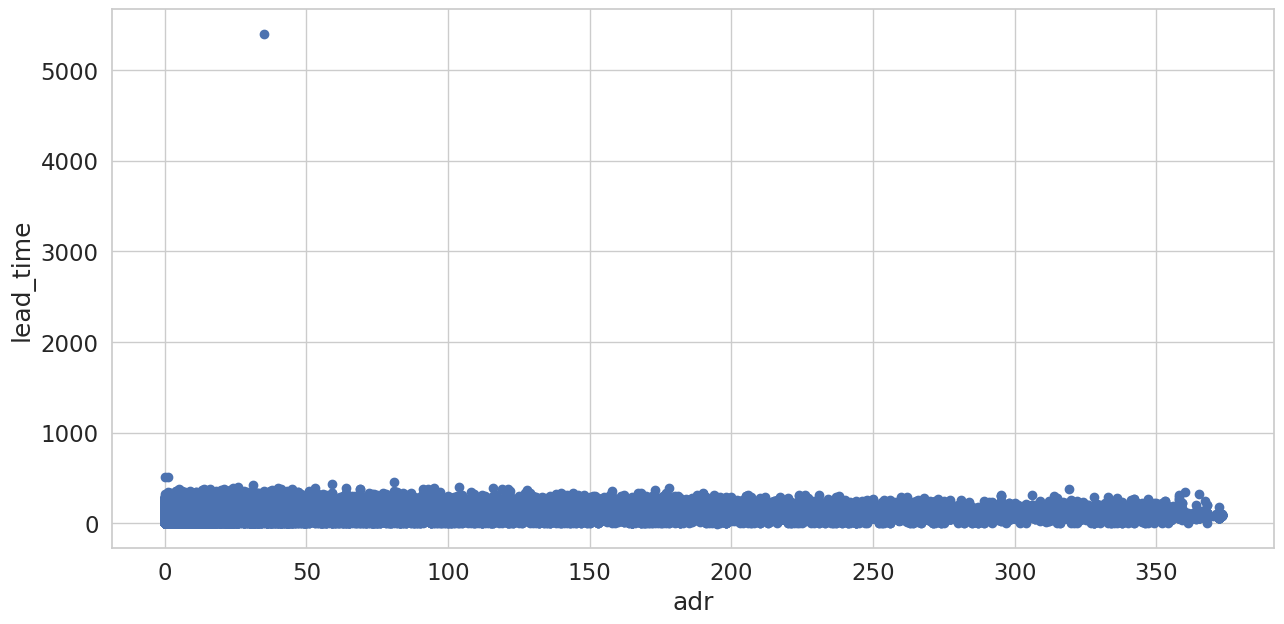

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['lead_time'], dataset['adr'])
 
# x-axis label
ax.set_xlabel('adr')
 
# y-axis label
ax.set_ylabel('lead_time')
plt.show()

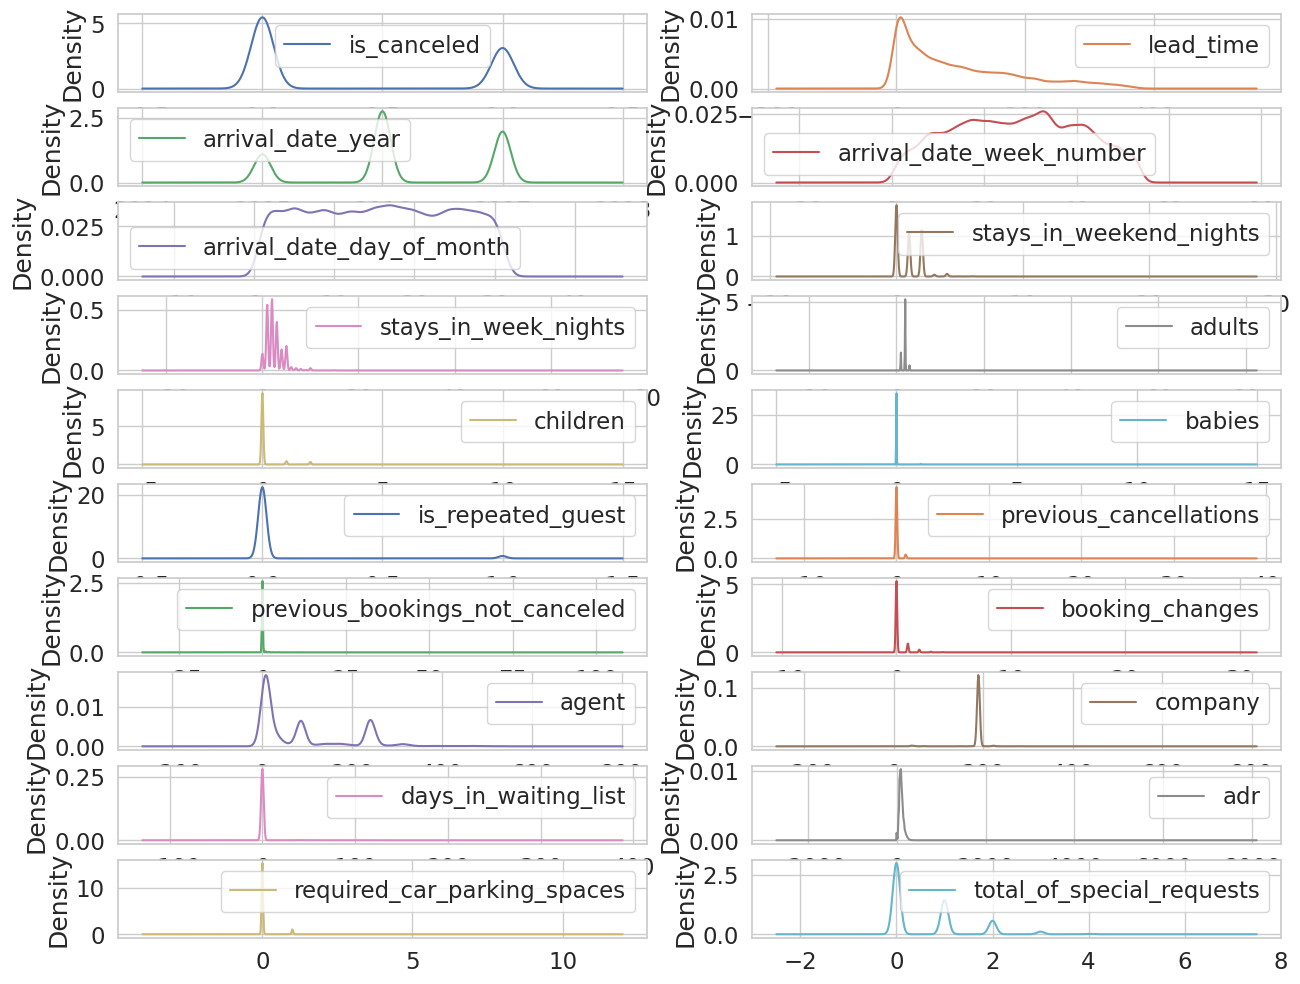

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

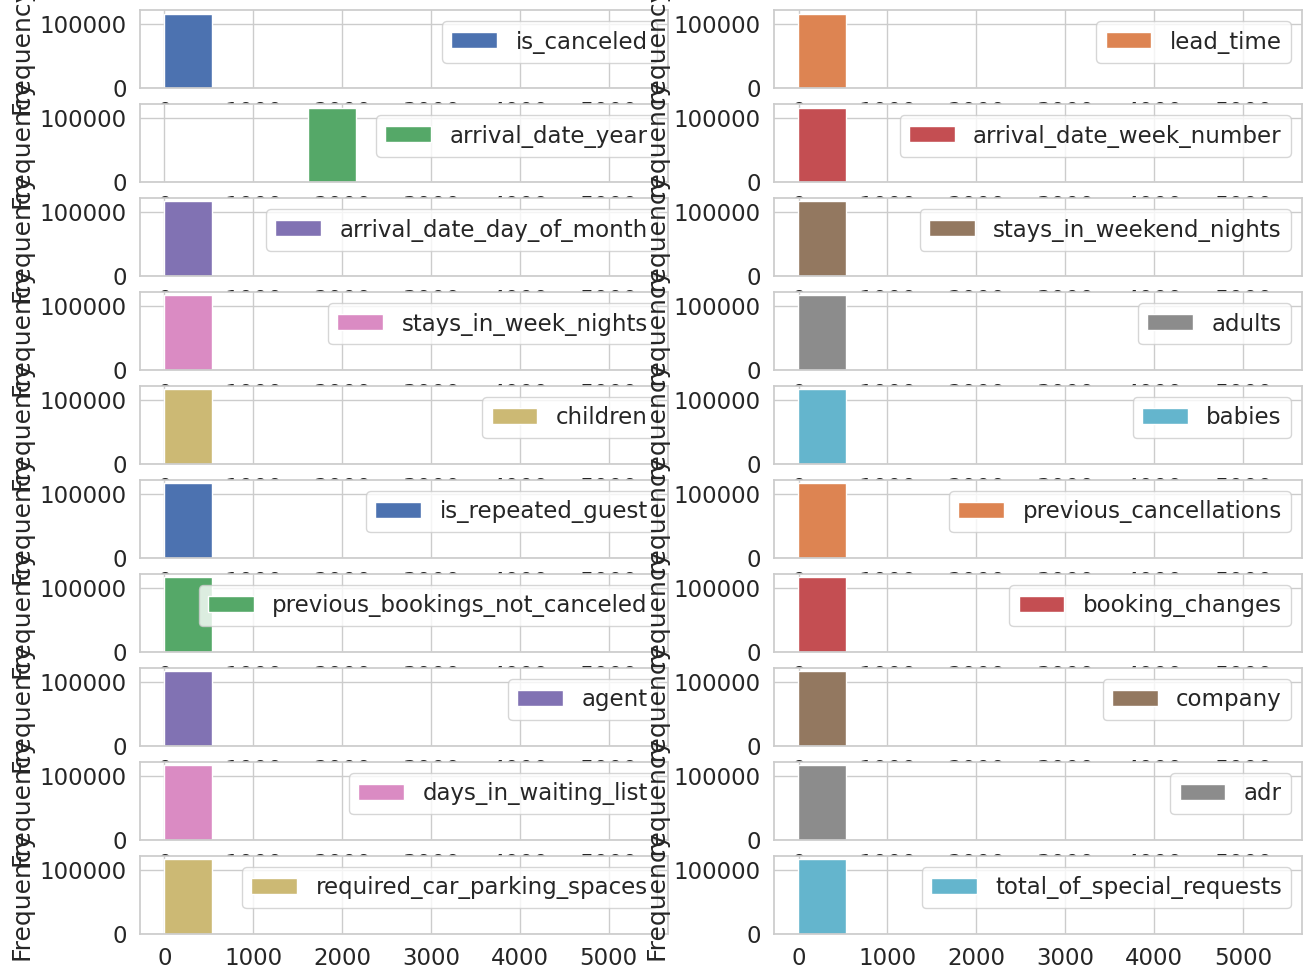

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

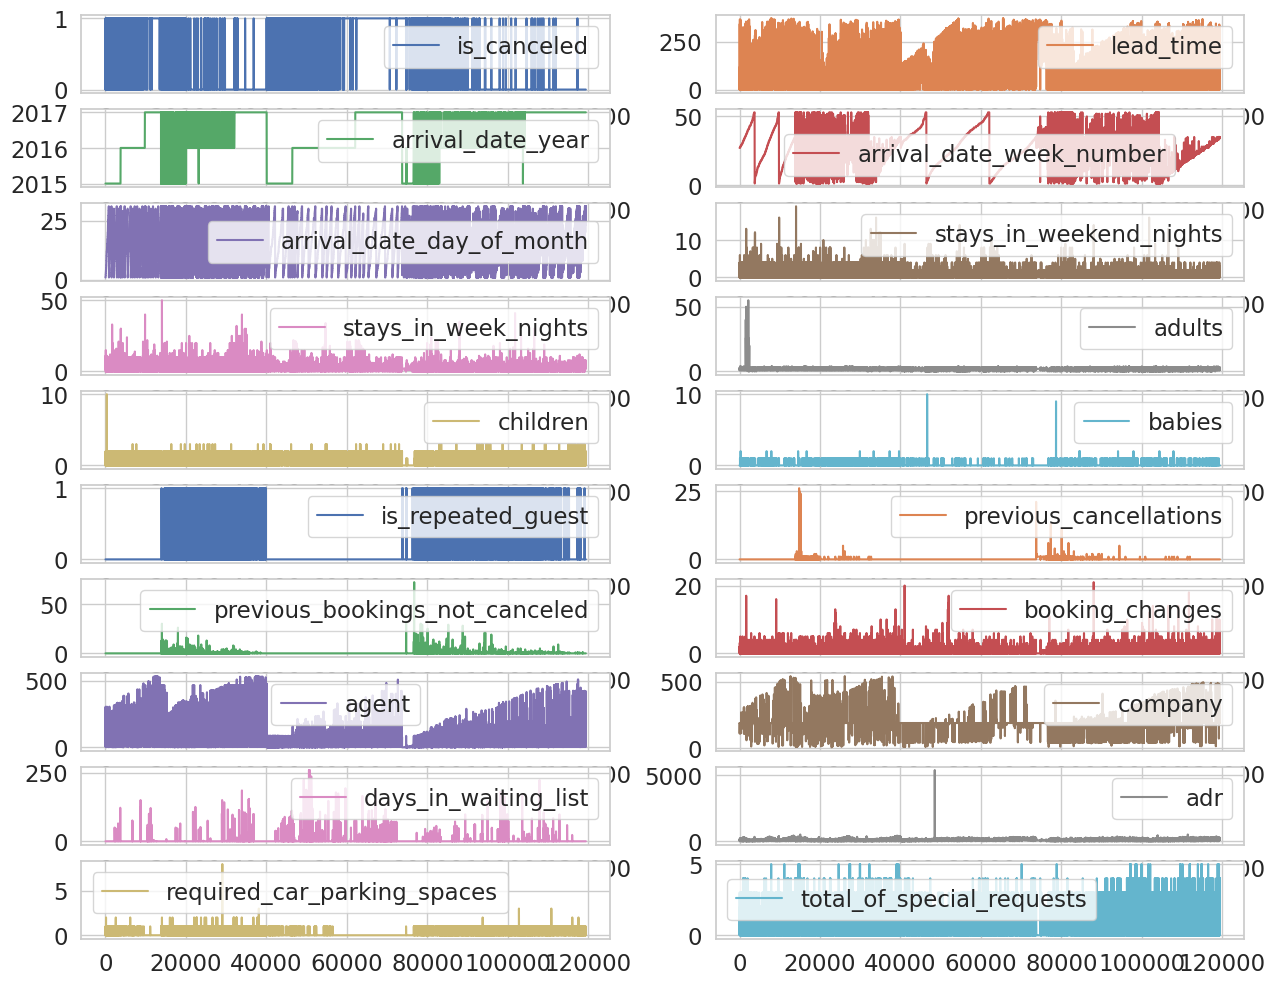

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

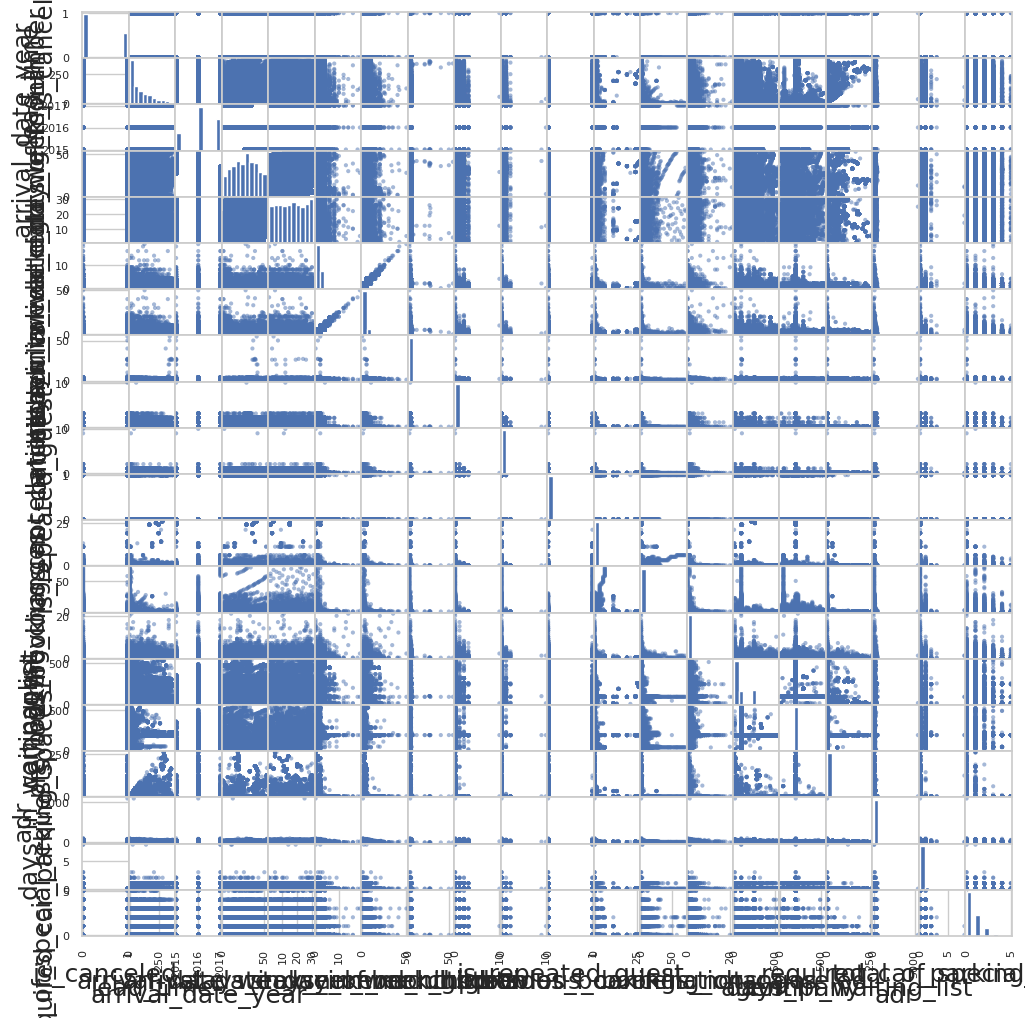

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

<ipython-input-51-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


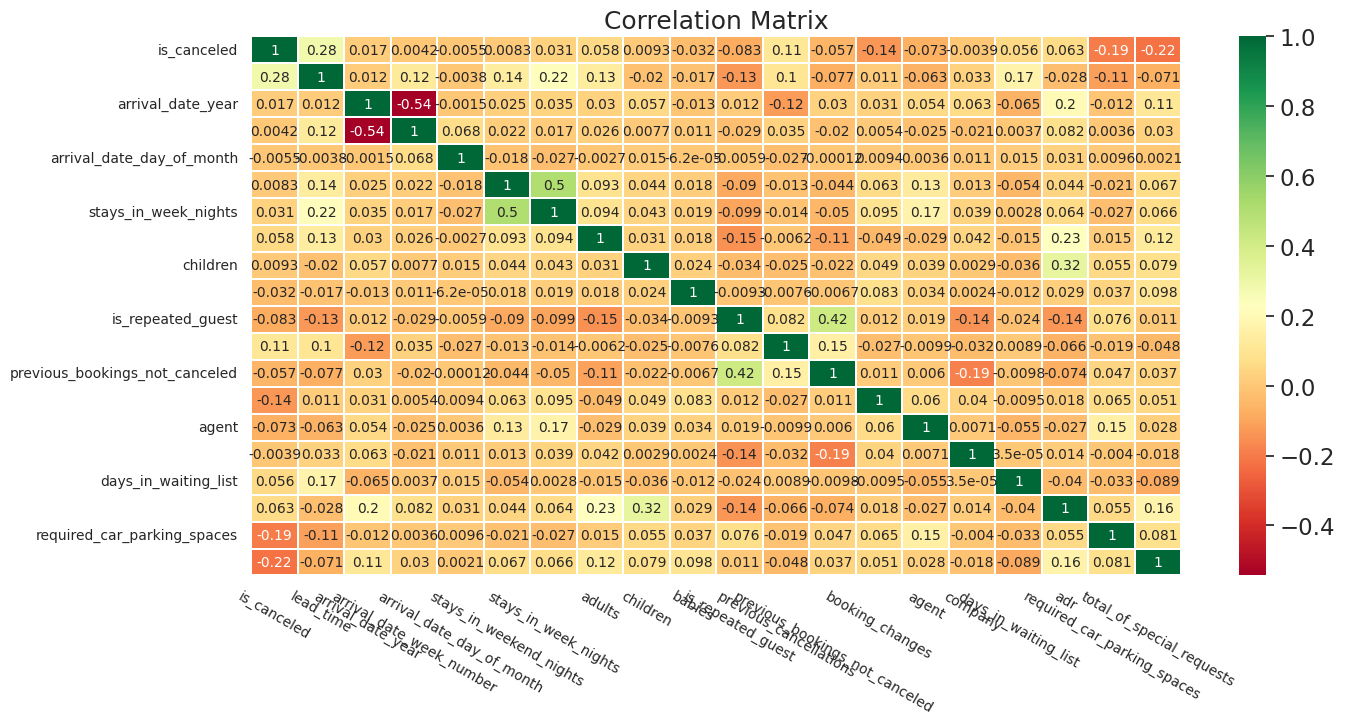

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

syntax ini untuk perintah memunculkan matrix pada data

4. Splitting Dataset

In [ ]:
x = dataset.drop('is_canceled', axis=1)
x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out
5,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,5,2,0.0,...,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,102,2017,August,35,31,2,5,3,0.0,...,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,34,2017,August,35,31,2,5,2,0.0,...,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,109,2017,August,35,31,2,5,2,0.0,...,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out


syntax ini sama seperti perintah sebelumnya adalah untuk menghapus data yaitu is_canceled

In [ ]:
y = dataset["is_canceled"]
y

0         0
2         0
3         0
4         0
5         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 116385, dtype: int64

In [ ]:
y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
x = pd.get_dummies(x)
x

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,342,2015,27,1,0,0,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,7,2015,27,1,0,1,1,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,13,2015,27,1,0,1,1,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,14,2015,27,1,0,2,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,14,2015,27,1,0,2,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
119386,102,2017,35,31,2,5,3,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
119387,34,2017,35,31,2,5,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
119388,109,2017,35,31,2,5,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0


untuk perintah data di atas ke dalam variabel dummy

In [ ]:
x.shape

(116385, 83)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,2.667833,-1.620702,-0.003502,-1.683877,-0.936448,-1.308830,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
1,-0.953973,-1.620702,-0.003502,-1.683877,-0.936448,-0.788152,-1.463212,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
2,-0.889105,-1.620702,-0.003502,-1.683877,-0.936448,-0.788152,-1.463212,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
3,-0.878293,-1.620702,-0.003502,-1.683877,-0.936448,-0.267473,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
4,-0.878293,-1.620702,-0.003502,-1.683877,-0.936448,-0.267473,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116380,-0.780991,1.196642,0.583316,1.619935,1.063726,1.294564,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
116381,0.073106,1.196642,0.583316,1.733859,1.063726,1.294564,1.958412,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
116382,-0.662066,1.196642,0.583316,1.733859,1.063726,1.294564,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326
116383,0.148786,1.196642,0.583316,1.733859,1.063726,1.294564,0.247600,-0.264129,-0.08253,-0.183968,...,0.354557,-0.352111,-0.036987,-0.188585,-0.070525,0.569449,-0.508698,-0.737673,0.754501,-0.102326


pada bagian ini untuk mengubah menjadi angka numerik

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 59332, 1: 33776})
Test distribution Counter({0: 14833, 1: 8444})


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.989732 (0.004162)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9810972204321863


data di atas di dapat hasil prediksi yaitu di dapat 0,9810972204321863

[[14759    74]
 [  366  8078]]


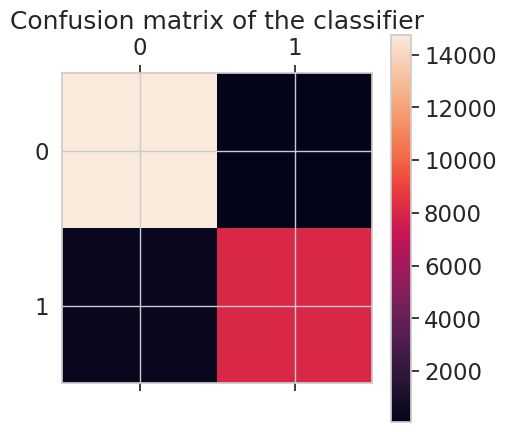

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

dari data di atas kita bisa mengevaluasi data yaitu True Positive (TP) 1400 , True Negative (TN) 8000, False Positive (FP) 2000 dan False Negative (FN) 2000.

---



In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14833
           1       0.99      0.96      0.97      8444

    accuracy                           0.98     23277
   macro avg       0.98      0.98      0.98     23277
weighted avg       0.98      0.98      0.98     23277



dari kesimpulan di atas di dapat hasil precision 0,98 recall 0,98 f1-score 0,98 dan support adalah 23277

